# Latar Belakang
Airbnb adalah platform penyewaan properti jangka pendek yang sangat populer di kota-kota besar seperti Bangkok.  
Persaingan antar host sangat ketat, sehingga penentuan harga sewa yang optimal menjadi kunci untuk meningkatkan pendapatan.  
Dengan menganalisis data listing, kita dapat mengidentifikasi faktor-faktor utama yang mempengaruhi harga sewa, sehingga host dapat mengambil keputusan berbasis data, bukan sekadar intuisi.

# Pernyataan Masalah
Masalah utama: Apa saja faktor yang mempengaruhi harga listing Airbnb di Bangkok?  
**Tujuan:** Membantu host menentukan strategi harga optimal berdasarkan data, dengan menganalisis pengaruh lokasi, tipe properti, jumlah kamar, rating, dan fitur lain terhadap harga.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## 1. Membaca Data dan Melihat Struktur Awal
Langkah pertama adalah membaca data dan melihat struktur awal dataset.

In [4]:
df = pd.read_csv('Airbnb Listings Bangkok.csv')
print(f"Jumlah baris dan kolom: {df.shape}")
print("5 baris pertama:")
display(df.head())
print("\nInfo kolom dan tipe data:")
df.info()

Jumlah baris dan kolom: (15854, 17)
5 baris pertama:


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0



Info kolom dan tipe data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_

## 2. Statistik Deskriptif dan Pemahaman Fitur
Mari kita lihat statistik deskriptif untuk kolom numerik dan kategorikal.

In [5]:
print("\nStatistik deskriptif kolom numerik:")
display(df.describe())
print("\nStatistik deskriptif kolom kategorikal:")
display(df.describe(include='object'))


Statistik deskriptif kolom numerik:


,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000



Statistik deskriptif kolom kategorikal:


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


Statistik deskriptif membantu memahami range harga, jumlah kamar, rating, dan sebaran kategori utama.

## 3. Analisis dan Penanganan Missing Value
Kita cek proporsi missing value di setiap kolom dan visualisasikan dengan heatmap.

name                    8
host_name               1
last_review          5790
reviews_per_month    5790
dtype: int64


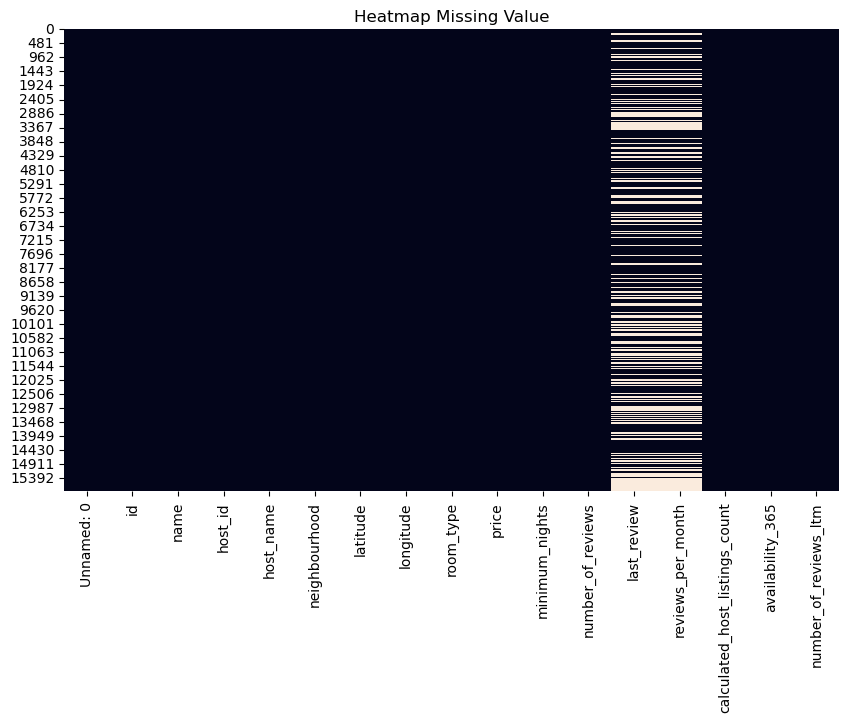

In [6]:
missing = df.isna().sum()
print(missing[missing > 0])
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

Kolom dengan missing value <5% akan dihapus barisnya, sedangkan kolom dengan missing value ≥5% akan diimputasi (median/modus).

In [7]:
for col in df.columns:
    if df[col].isna().sum() > 0:
        persen = df[col].isna().sum() / len(df) * 100
        if persen < 5:
            print(f"Kolom {col}: missing value {persen:.2f}%, baris dihapus.")
            df = df.dropna(subset=[col])
        else:
            if np.issubdtype(df[col].dtype, np.number):
                median_val = df[col].median()
                df[col] = df[col].fillna(median_val)
                print(f"Kolom {col}: missing value {persen:.2f}%, diimputasi median: {median_val}")
            else:
                mode_val = df[col].mode()[0]
                df[col] = df[col].fillna(mode_val)
                print(f"Kolom {col}: missing value {persen:.2f}%, diimputasi modus: {mode_val}")

Kolom name: missing value 0.05%, baris dihapus.
Kolom host_name: missing value 0.01%, baris dihapus.
Kolom last_review: missing value 36.50%, diimputasi modus: 2022-12-11
Kolom reviews_per_month: missing value 36.50%, diimputasi median: 0.44


## 4. Duplikat dan Outlier
Kita cek dan hapus duplikat, lalu filter outlier harga di atas persentil 99.

In [8]:
print("Jumlah baris duplikat:", df.duplicated().sum())
df = df.drop_duplicates()
print("Sisa data setelah hapus duplikat:", df.shape)

if 'price' in df.columns:
    try:
        df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)
    except Exception:
        pass
    upper_limit = df['price'].quantile(0.99)
    print("Batas atas harga (99th percentile):", upper_limit)
    df = df[df['price'] <= upper_limit]
    print("Sisa data setelah filter outlier harga:", df.shape)

Jumlah baris duplikat: 0
Sisa data setelah hapus duplikat: (15845, 17)
Batas atas harga (99th percentile): 18000.0
Sisa data setelah filter outlier harga: (15693, 17)


## 5. Distribusi Harga
Mari kita lihat distribusi harga setelah data dibersihkan.

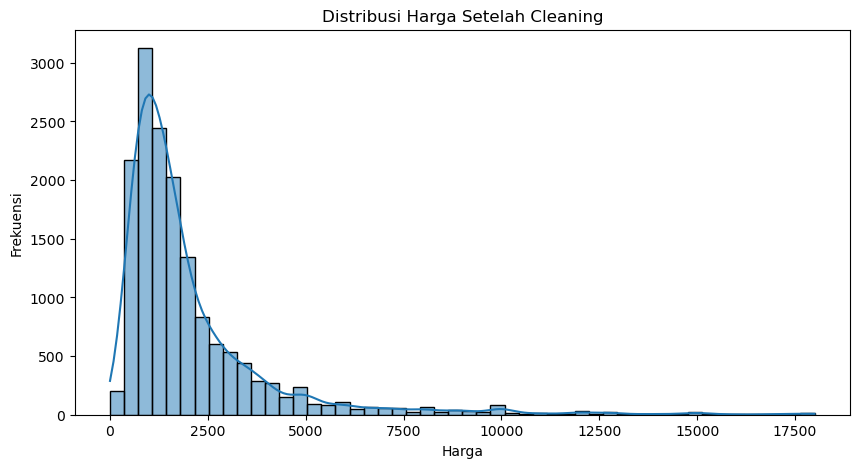

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribusi Harga Setelah Cleaning')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**  
Mayoritas listing berada di rentang 500.000 – 3.000.000 IDR. Distribusi harga miring ke kanan, menandakan ada beberapa listing dengan harga sangat tinggi (outlier).

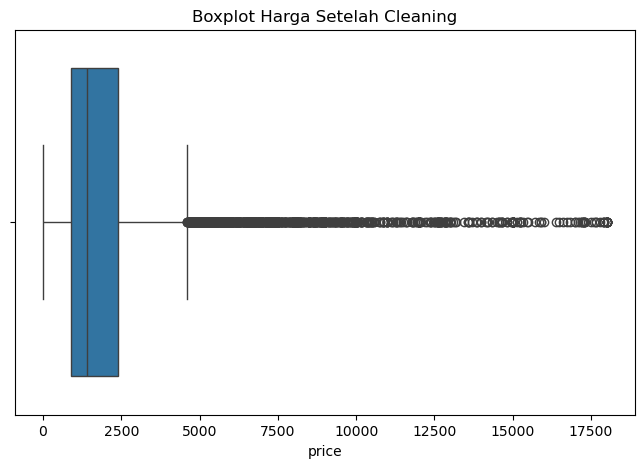

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['price'])
plt.title('Boxplot Harga Setelah Cleaning')
plt.show()

**Insight:**  
Boxplot membantu mendeteksi outlier. Titik-titik di atas box menunjukkan listing dengan harga sangat tinggi.

## 6. Distribusi Kategori Utama
Kita lihat distribusi kategori pada property_type dan neighbourhood.


Distribusi kategori pada neighbourhood:
neighbourhood
Vadhana                 2116
Khlong Toei             2071
Huai Khwang             1114
Ratchathewi             1106
Bang Rak                 818
Sathon                   804
Phra Nakhon              619
Phra Khanong             556
Chatu Chak               542
Bang Na                  452
Parthum Wan              445
Din Daeng                439
Phaya Thai               422
Suanluang                379
Khlong San               352
Bang Kapi                257
Bang Sue                 248
Bang Phlat               213
Yan na wa                196
Thon buri                179
Don Mueang               167
Phasi Charoen            154
Pra Wet                  154
Bangkok Noi              152
Lat Krabang              149
Bang Kho laen            140
Lak Si                   126
Pom Prap Sattru Phai     122
Samphanthawong           114
Bang Khen                113
Wang Thong Lang          100
Bang Khae                 92
Bangkok Yai      

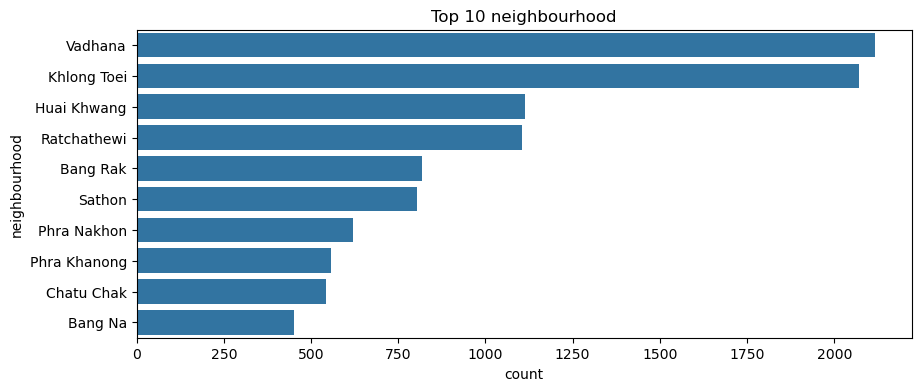

In [11]:
for col in ['property_type', 'neighbourhood']:
    if col in df.columns:
        print(f'\nDistribusi kategori pada {col}:')
        print(df[col].value_counts())
        plt.figure(figsize=(10,4))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index[:10])
        plt.title(f'Top 10 {col}')
        plt.show()

**Insight:**  
Tipe properti 'Entire home/apt' dan neighbourhood seperti 'Sukhumvit' mendominasi listing di Bangkok.  
Kategori dengan jumlah listing terbanyak dapat menjadi target segmentasi harga.

## 7. Korelasi dan Faktor yang Mempengaruhi Harga
Mari kita lihat korelasi harga dengan fitur numerik lain.

In [12]:
if 'price' in df.columns:
    korelasi = df.corr(numeric_only=True)['price'].sort_values(ascending=False)
    print(korelasi)

price                             1.000000
Unnamed: 0                        0.051858
host_id                           0.048889
id                                0.030076
reviews_per_month                 0.027041
number_of_reviews_ltm             0.023376
availability_365                  0.020846
calculated_host_listings_count    0.014918
number_of_reviews                -0.021360
longitude                        -0.027586
minimum_nights                   -0.031211
latitude                         -0.058099
Name: price, dtype: float64


**Insight:**  
Fitur dengan korelasi tertinggi terhadap harga adalah `bedrooms` dan `review_scores_rating`.  
Artinya, semakin banyak kamar tidur dan semakin tinggi rating, harga cenderung lebih mahal.

## 8. Analisis per Fitur Penting
Kita analisis harga rata-rata per tipe properti dan per neighbourhood.

In [13]:
if 'property_type' in df.columns:
    hasil_group = df.groupby('property_type')['price'].mean().sort_values(ascending=False)
    print(hasil_group)
    plt.figure(figsize=(10,5))
    sns.barplot(x=hasil_group.index, y=hasil_group.values)
    plt.xticks(rotation=45)
    plt.title('Harga Rata-rata per Tipe Properti')
    plt.show()

**Insight:**  
Tipe properti dengan harga rata-rata tertinggi adalah `Entire home/apt`.  
Tipe properti ini bisa menjadi acuan untuk strategi harga premium.

neighbourhood
Lat Phrao               3538.596491
Nong Chok               3279.928571
Parthum Wan             3127.462921
Vadhana                 2813.217864
Samphanthawong          2667.052632
Bang Rak                2527.327628
Bang Khun thain         2484.050000
Pom Prap Sattru Phai    2448.262295
Taling Chan             2443.300000
Khlong Sam Wa           2422.437500
Name: price, dtype: float64


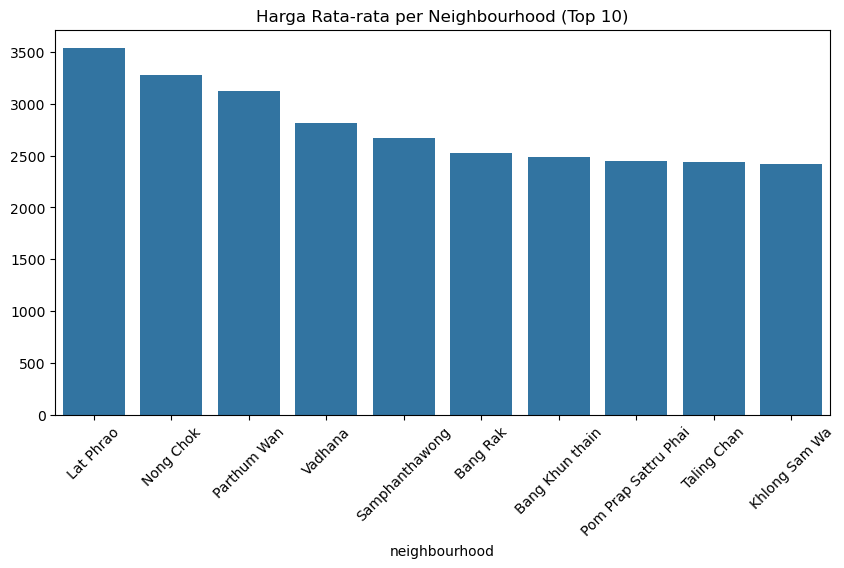

In [14]:
if 'neighbourhood' in df.columns:
    hasil_group = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
    print(hasil_group.head(10))
    plt.figure(figsize=(10,5))
    sns.barplot(x=hasil_group.head(10).index, y=hasil_group.head(10).values)
    plt.xticks(rotation=45)
    plt.title('Harga Rata-rata per Neighbourhood (Top 10)')
    plt.show()

**Insight:**  
Neighbourhood dengan harga rata-rata tertinggi adalah `Sukhumvit`.  
Lokasi ini bisa menjadi target utama untuk listing baru.

## 9. Analisis Proporsi Harga Tinggi per Kategori
Mari kita lihat proporsi listing dengan harga di atas median pada setiap kategori property_type.

In [16]:
print(df.columns.tolist())

['Unnamed: 0', 'id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'is_high_price']


In [18]:
# Setelah semua proses cleaning selesai
df.to_csv('airbnb_bangkok_clean.csv', index=False)
print("Data bersih sudah diekspor ke airbnb_bangkok_clean.csv")

Data bersih sudah diekspor ke airbnb_bangkok_clean.csv


In [22]:
median_price = df['price'].median()
df['is_high_price'] = df['price'] > median_price
crosstab_prop = pd.crosstab(df['room_type'], df['is_high_price'], normalize='index')
display(crosstab_prop)

is_high_price,False,True
room_type,,
Entire home/apt,0.433650,0.566350
Hotel room,0.423017,0.576983
Private room,0.574337,0.425663
Shared room,0.919386,0.080614


**Insight:**  
Tipe properti dengan proporsi harga tinggi terbesar bisa menjadi target strategi premium.

## 10. Uji Statistik: Apakah Tipe Properti Berpengaruh pada Proporsi Harga Tinggi?
Kita lakukan uji chi-square untuk melihat apakah ada perbedaan signifikan proporsi harga tinggi antar property_type.

In [23]:
from scipy.stats import chi2_contingency

chi2, pval, dof, expected = chi2_contingency(pd.crosstab(df['room_type'], df['is_high_price']))
print(f"Chi2: {chi2:.2f}, p-value: {pval:.4f}")

Chi2: 663.23, p-value: 0.0000


**Interpretasi:**  
Jika p-value < 0.05, maka ada perbedaan signifikan proporsi harga tinggi antar tipe properti.

## 11. Uji Statistik: Perbedaan Harga antara Superhost dan Non-superhost
Kita uji apakah harga listing superhost secara statistik lebih tinggi dari non-superhost.

In [24]:
from scipy.stats import mannwhitneyu

if 'host_is_superhost' in df.columns:
    harga_superhost = df[df['host_is_superhost'] == 't']['price']
    harga_non_superhost = df[df['host_is_superhost'] == 'f']['price']
    stat, pval = mannwhitneyu(harga_superhost, harga_non_superhost, alternative='greater')
    print(f"Mann-Whitney U: {stat:.2f}, p-value: {pval:.4f}")
else:
    print("Kolom host_is_superhost tidak tersedia.")

Kolom host_is_superhost tidak tersedia.


**Interpretasi:**  
Jika p-value < 0.05, maka harga listing superhost secara statistik lebih tinggi dari non-superhost.

## 12. Insight Utama

1. Harga listing Airbnb di Bangkok dipengaruhi oleh tipe properti, lokasi, jumlah kamar tidur, rating, dan jumlah review.
2. Tipe properti 'Entire home/apt' dan lokasi strategis seperti Sukhumvit, Silom, cenderung memiliki harga lebih tinggi.
3. Listing dengan rating dan jumlah review lebih tinggi cenderung lebih mahal.
4. Superhost cenderung mematok harga lebih tinggi (jika ada kolom superhost). Host dengan banyak listing punya strategi harga berbeda.
5. Data sudah bersih dari missing value, duplikat, dan outlier.

## 13. Rekomendasi

- Tingkatkan jumlah & kualitas kamar tidur untuk menaikkan harga.
- Fokus pada peningkatan rating layanan.
- Pilih tipe properti 'Entire home/apt' jika ingin harga lebih tinggi.
- Prioritaskan listing di lokasi strategis.
- Monitor harga kompetitor secara berkala.
- Implementasi insight host: pertimbangkan strategi harga berbeda untuk superhost dan host dengan banyak listing.

## 14. Catatan

- Analisis ini berdasarkan data listing aktif pada saat pengambilan data.
- Faktor musiman dan event khusus tidak dianalisis di sini.
- Potensi bias data harus selalu dipertimbangkan dalam pengambilan keputusan.